### Descargar imágenes

In [ ]:
import os
if os.path.exists('Imagenes'):   
    print ('La carpeta ya existe')
else:
    os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
    os.system('unzip Imagenes.zip?dl=1')
    os.system('rm -r Imagenes.zip?dl=1')
    print('ImAgenes descargadas')

### Cargar librerías

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 1279.5, 719.5, -0.5)

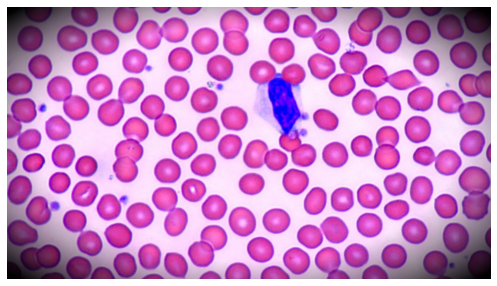

In [2]:
img = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/LINFO1.png")
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.imshow(img)
plt.axis('off')

### Teoría
El algoritmo de Canny es un popular método de detección de bordes, desarrollado por John F. Canny en 1986. El algoritmo consta de múltiples etapas, cada una de las cuales se explicarán a continuación.

### Reducción de ruido
Debido a que la detección de bordes es un proceso susceptible al ruido en la imagen, el primer paso es eliminarlo o reducirlo lo más que se pueda. 

Para esto, el algoritmo utiliza un filtro Gaussiano $5×5$.

$$k=\frac{1}{159}\begin{bmatrix}
2 & 4 & 5 & 4 & 2 \\ 
4 & 9 & 12 & 9 & 4 \\ 
5 & 12 & 15 & 12 & 5 \\ 
4 & 9 & 12 & 9 & 4 \\ 
2 & 4 & 5 & 4 & 2 \\ 
\end{bmatrix}$$

### Encontrar el gradiente de intensidad
Una vez que la imagen ha sido alisada con el filtro Gaussiano, se calcula el gradiente de la misma. Para esto la imagen se filtra nuevamente, esta vez utilizando un kernel Sobel en la dirección horizontal ($Gx$) y la dirección vertical ($Gy$). 

Los kernel Sobel de 3x3 tienen la siguiente estructura:

$$G_{x}=\begin{bmatrix} -1 & 0 & 1 \\  -2 & 0 & 2\\  -1 & 0 & 1 \\ \end{bmatrix}\, G_{x}=\begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0\\ 1 & 2 & 1 \\ \end{bmatrix}$$

A partir de estas dos imágenes, resultado de aplicar ambos kernels $Gx$ y $Gy$, se pueden encontrar los bordes y la dirección del gradiente en cada píxel de la imagen original:

$$Edge\_Gradient(G)=\sqrt{G_{x}^{2}+G_{y}^{2}}$$

$$Angle(\theta) =tan^{-1}(\frac{G_{x}}{G_{y}})$$

donde $Edge\_Gradient$ es el valor del gradiente en los bordes de los objetos de la imagen y $Angle$ indica la dirección perpendicular a los bordes. 

El valor de este ángulo se redondea a uno de los cuatro ángulos que representan la dirección vertical, la horizontal y las dos diagonales (0°, 45°, 90° y 135°).

### Supresión de falsos máximos
Esta técnica es utilizada para afinar los bordes encontrados en el paso anterior. Básicamente, consiste en escanear la imagen para eliminar los píxeles que no formen parte de los bordes. 

Para esto se compara el valor de cada píxel con sus vecinos cercanos en la dirección del gradiente (perpendicular al borde). 

- Si el valor del píxel en cuestión es mayor que sus píxeles vecinos, entonces este es considerado un máximo local y el agoritmo lo acepta. 
- De lo contrario, si el píxel resulta no ser un máximo local, entonces es suprimido. 

El resultado final será una imagen con bordes muy finos.

### Umbral de histéresis
El procedimiento anterior logra determinar los píxeles que conforman los bordes con bastante precisión. Sin embargo, aún pueden quedar algunos píxeles provenientes del ruido o  de variaciones en los colores de la imagen. 

En esta cuarta estapa se decide cuáles píxeles pertenecen realmente a bordes y cuáles no. Para ello, se deben fijar dos valores de umbral, $minVal$ y $maxVal$. 

 - Los píxeles con gradientes de intensidad mayores que $maxVal$ serán aceptados como pertenecientes a los bordes, mientras que los  menores que $minVal$ serán descartados. 
 
Los píxeles correspondientes a bordes con valores de gradientes que se encuentren entre estos dos umbrales son etiquetados como píxeles débiles. Estos últimos serán o no aceptados, dependiendo de su conectividad. 

- Si están conectados a píxeles “fuertes”, se consideran parte de los bordes; de lo contrario, también se descartan. 

Para entender mejor este procedimiento, veamos el siguiente ejemplo:

![texto alternativo](https://unipython.com/wp-content/uploads/2017/07/plotThresholding.png)

El gráfico muestra el valor de la intensidad de los píxeles que conforman los bordes. 

En este caso, el píxel A será aceptado como parte del borde dado que su valor supera el umbral $maxVal$, mientras que el píxel D será descartado por tener un valor inferior a $minVal$. 

Por otra parte, los píxeles B y C se considerados débiles por encontrarse entre los dos valores umbrales. Sin embargo, B será aceptado como parte de un borde, mientras que C no. 

La razón de esto, es que B está conectado a A, que es un píxel fuerte, pero C sólo está conectado a píxeles débiles o descartados.

### Algoritmo de canny en OpenCV
Todos los pasos del algoritmo de Canny están contenidos en una simple funcion en OpenCV: cv2.Canny(). 

El primer argumento es la imagen de entrada, mientras que el segundo y tercer argumento son $minVal$ y $maxVal$, respectivamente. 

El cuarto argumento es aperture_size, que no es más que el tamaño del kernel Sobel utilizado para buscar gradientes de imagen (por defecto es 3). 

El último argumento es L2gradient que especifica la ecuación para encontrar la magnitud del gradiente. Si es verdadero, utiliza la ecuación mencionada anteriormente que es más exacta, de lo contrario utiliza esta función:

$$Edge\_Gradient(G)=\left | G_{x} \right |+\left | G_{y} \right |$$

que viene desactivado por defecto

Argumentos de la función:

```
cv2.Canny(Imagen, minVal, maxVal, apertureSize = 3, L2gradient = True)
    Imagen:       Imagen
    minVal:       Valor mínimo del umbral con histéresis
    maxVal:       Valor máximo del umbral con histéresis
    apertureSize: Tamaño del kernel Sobel
    L2gradient:   Calculo de la intesidad del gradiente

```


### Implementación

(-0.5, 1279.5, 719.5, -0.5)

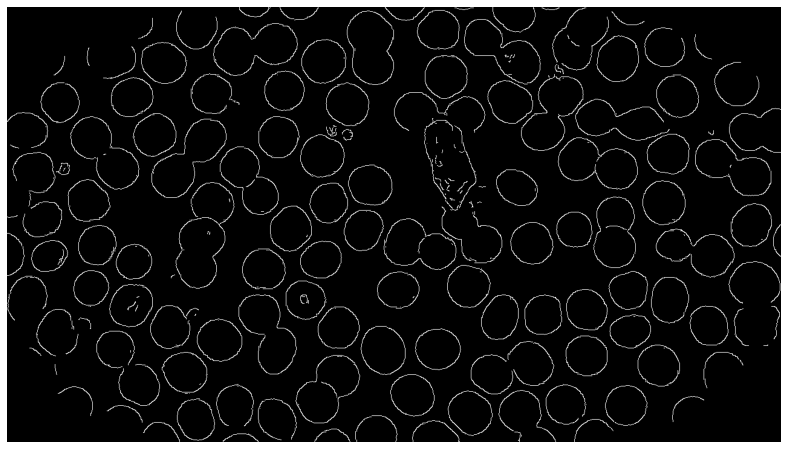

In [27]:
bordes = cv2.Canny(img, 160, 200, apertureSize = 3, L2gradient = True)

plt.figure(figsize=(20,8))
plt.imshow(bordes, cmap='gray')
plt.axis('off')

### 